<a href="https://colab.research.google.com/github/nisha1365/-Playground-Series---Season-3-Episode-14/blob/main/PS3E14_CatBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
!pip install catboost
import catboost as ctb
!pip install shap
import shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 11.1 MB/s eta 0:00:00


In [4]:
test = pd.read_csv("/content/test.csv")
train = pd.read_csv("/content/train.csv")

In [5]:
train = train.drop("id",axis = 1)
train.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             15289 non-null  float64
 1   honeybee              15289 non-null  float64
 2   bumbles               15289 non-null  float64
 3   andrena               15289 non-null  float64
 4   osmia                 15289 non-null  float64
 5   MaxOfUpperTRange      15289 non-null  float64
 6   MinOfUpperTRange      15289 non-null  float64
 7   AverageOfUpperTRange  15289 non-null  float64
 8   MaxOfLowerTRange      15289 non-null  float64
 9   MinOfLowerTRange      15289 non-null  float64
 10  AverageOfLowerTRange  15289 non-null  float64
 11  RainingDays           15289 non-null  float64
 12  AverageRainingDays    15289 non-null  float64
 13  fruitset              15289 non-null  float64
 14  fruitmass             15289 non-null  float64
 15  seeds              

Conclusion:

The train dataset contains 17 features and 15289 entries.
We have 17 variables including 16 independent variables and 1 dependent variable: yield.
The features have a float64 type.
There is no missing value in the dataset.

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
clonesize,15289.0,19.704690,6.595211,10.000000,12.500000,25.000000,25.000000,40.000000
honeybee,15289.0,0.389314,0.361643,0.000000,0.250000,0.500000,0.500000,18.430000
bumbles,15289.0,0.286768,0.059917,0.000000,0.250000,0.250000,0.380000,0.585000
andrena,15289.0,0.492675,0.148115,0.000000,0.380000,0.500000,0.630000,0.750000
osmia,15289.0,0.592355,0.139489,0.000000,0.500000,0.630000,0.750000,0.750000
MaxOfUpperTRange,15289.0,82.169887,9.146703,69.700000,77.400000,86.000000,86.000000,94.600000
MinOfUpperTRange,15289.0,49.673281,5.546405,39.000000,46.800000,52.000000,52.000000,57.200000
AverageOfUpperTRange,15289.0,68.656256,7.641807,58.200000,64.700000,71.900000,71.900000,79.000000
MaxOfLowerTRange,15289.0,59.229538,6.610640,50.200000,55.800000,62.000000,62.000000,68.200000
MinOfLowerTRange,15289.0,28.660553,3.195367,24.300000,27.000000,30.000000,30.000000,33.000000


In [8]:
train.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [9]:
print("Duplicated Data: ", train.duplicated().sum())

Duplicated Data:  7


In [10]:
train_ = train.drop_duplicates()
print("Duplicated Data:", train_.duplicated().sum())

Duplicated Data: 0


In [11]:
train_.corr()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.303882,0.080693,0.065565,-0.006486,0.016108,0.015786,0.016003,0.016291,0.015975,0.015937,0.165174,0.164196,-0.406096,-0.377071,-0.396271,-0.381955
honeybee,0.303882,1.000000,-0.017873,0.030821,-0.009987,0.005818,0.005733,0.005869,0.005920,0.005787,0.005463,0.046238,0.037260,-0.120130,-0.135007,-0.138948,-0.117665
bumbles,0.080693,-0.017873,1.000000,-0.165309,0.157978,-0.002082,-0.001791,-0.001747,-0.001591,-0.001782,-0.001622,-0.063281,-0.060244,0.160505,0.163982,0.177041,0.161190
andrena,0.065565,0.030821,-0.165309,1.000000,0.309433,-0.013278,-0.013144,-0.013210,-0.013141,-0.013251,-0.013287,-0.026387,-0.026998,0.073374,0.064420,0.063239,0.073746
osmia,-0.006486,-0.009987,0.157978,0.309433,1.000000,-0.031380,-0.030807,-0.031402,-0.031386,-0.031474,-0.031326,-0.079217,-0.078026,0.208578,0.191387,0.199748,0.197409
MaxOfUpperTRange,0.016108,0.005818,-0.002082,-0.013278,-0.031380,1.000000,0.998599,0.999806,0.999503,0.999829,0.999772,0.011370,0.010378,0.007549,0.146261,0.060954,-0.022552
MinOfUpperTRange,0.015786,0.005733,-0.001791,-0.013144,-0.030807,0.998599,1.000000,0.999004,0.998198,0.998953,0.999040,0.011774,0.010793,0.008379,0.147228,0.061805,-0.021962
AverageOfUpperTRange,0.016003,0.005869,-0.001747,-0.013210,-0.031402,0.999806,0.999004,1.000000,0.999464,0.999973,0.999974,0.011290,0.010285,0.008474,0.147703,0.062077,-0.021972
MaxOfLowerTRange,0.016291,0.005920,-0.001591,-0.013141,-0.031386,0.999503,0.998198,0.999464,1.000000,0.999489,0.999423,0.011349,0.010288,0.007871,0.146693,0.061371,-0.022230
MinOfLowerTRange,0.015975,0.005787,-0.001782,-0.013251,-0.031474,0.999829,0.998953,0.999973,0.999489,1.000000,0.999963,0.011513,0.010505,0.007878,0.146728,0.061353,-0.022354


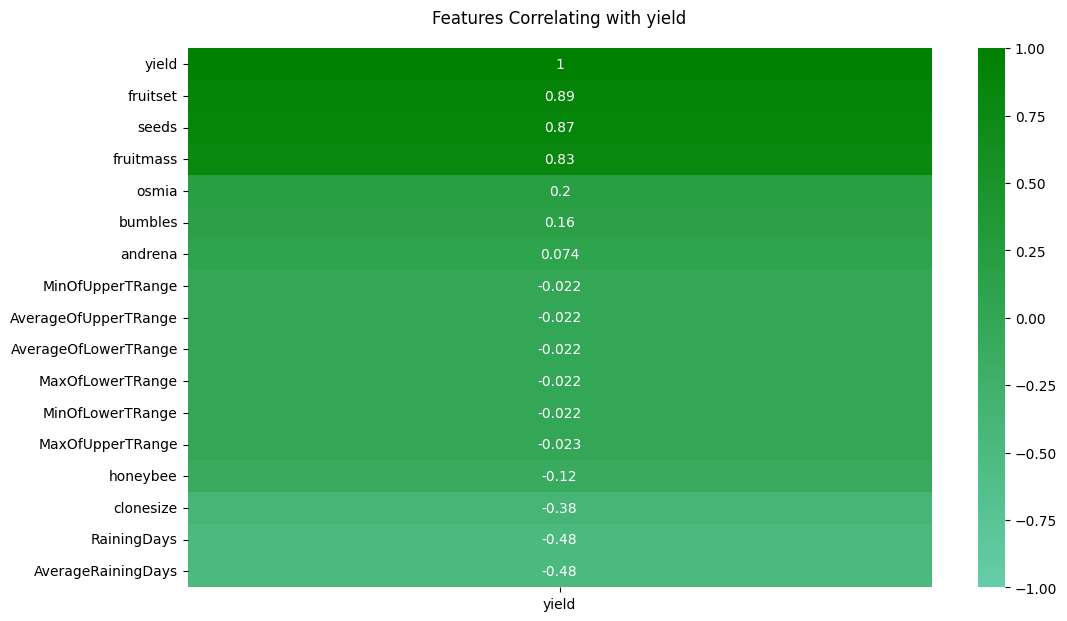

In [12]:
blue_cmap = LinearSegmentedColormap.from_list('green', ['#66CDAA','green'])
plt.figure (figsize = (12, 7), dpi = 100)
heatmap = sns.heatmap (train.corr()[['yield']].sort_values (by = 'yield', ascending = False), cmap=blue_cmap, vmin = -1, vmax = 1, annot = True)
heatmap.set_title ('Features Correlating with yield', fontdict = {'fontsize':12}, pad = 18);

Conclusion:

We can see a strong correlation between yield and fruitset, seeds and fruitmass.

In [13]:
X = train_.drop(columns=['yield'])
y = train_['yield']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [57]:
model = ctb.CatBoostRegressor(loss_function='MAE', iterations=500, learning_rate=0.1, random_seed=42, verbose=False,max_depth = 6,subsample = 0.7)
model.fit(X_train, y_train)
preds_val = model.predict(X_valid)
mae = mean_absolute_error(y_valid, preds_val)
print("MAE:", mae)

MAE: 344.6251374579353


In [58]:
X = test.drop(columns=['id'])
final_prediction = model.predict(X)
final_test = pd.DataFrame({'id' : test['id'], 'yield' : final_prediction})
final_test

,id,yield
0,15289,4185.851904
1,15290,5962.495544
2,15291,7284.870507
3,15292,4706.040463
4,15293,3833.592758
...,...,...
10189,25478,5490.861153
10190,25479,5612.981684
10191,25480,6528.360004
10192,25481,4461.596140


In [59]:
final_test.to_csv("submission.csv", index = False)